Importing packages and the csv with sentiment data

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import re

scores = pd.read_csv('Assignment 3 Sentiment Scores.csv')
scores.head()

/Users/timothylai/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [2]:
models = scores.columns.tolist()
for m in range(0,len(models)):
    models[m] = models[m].lower()
models
scores.columns = models

Calculation of edge's between all different model combinations

In [3]:
edge_list = []

def get_edges():
    for model1 in models:
        for model2 in models[models.index(model1)+1:]:
            pos_sent = []
            neg_sent = []
            for i in range(0,len(scores)):
                sent_model1 = scores[model1][i]
                sent_model2 = scores[model2][i]
                if (not(np.isnan(sent_model1)) & (not(np.isnan(sent_model2)))):
                    edge_weight = sent_model1 - sent_model2
                    if edge_weight >= 0:
                        pos_sent.append(edge_weight)
                    elif edge_weight < 0:
                        neg_sent.append(edge_weight)
            if len(pos_sent) > 0:
                edge_list.append([model1, model2, np.mean(pos_sent)])
            if len(neg_sent) > 0:
                edge_list.append([model2, model1, abs(np.mean(neg_sent))])
    return edge_list

get_edges()

[['es', 'ls', 0.30434782608695654],
 ['ls', 'es', 2.0],
 ['es', 'rx', 0.83333333333333337],
 ['rx', 'es', 2.0],
 ['es', 'a8', 2.8333333333333335],
 ['a8', 'es', 3.0],
 ['es', 'a6', 6.0],
 ['a6', 'es', 1.6666666666666667],
 ['es', '3series', 3.25],
 ['3series', 'es', 6.0],
 ['es', '5series', 4.0],
 ['5series', 'es', 5.0],
 ['es', '7series', 3.0],
 ['7series', 'es', 2.7999999999999998],
 ['es', 'xj', 0.5],
 ['xj', 'es', 1.0],
 ['es', 'sclass', 3.2857142857142856],
 ['sclass', 'es', 2.6153846153846154],
 ['ls', 'rx', 1.0],
 ['rx', 'ls', 1.1428571428571428],
 ['ls', 'a8', 2.3529411764705883],
 ['a8', 'ls', 2.8378378378378377],
 ['ls', 'a6', 2.7272727272727271],
 ['a6', 'ls', 1.2857142857142858],
 ['ls', '3series', 2.3333333333333335],
 ['3series', 'ls', 4.0],
 ['ls', '5series', 2.4545454545454546],
 ['5series', 'ls', 3.1000000000000001],
 ['ls', '7series', 2.1142857142857143],
 ['7series', 'ls', 2.75],
 ['ls', 'xj', 2.0],
 ['xj', 'ls', 2.8888888888888888],
 ['ls', 'sclass', 2.1477272727272

<b> Putting edge values calculated above into the network, then displaying the bidirectional network below. 

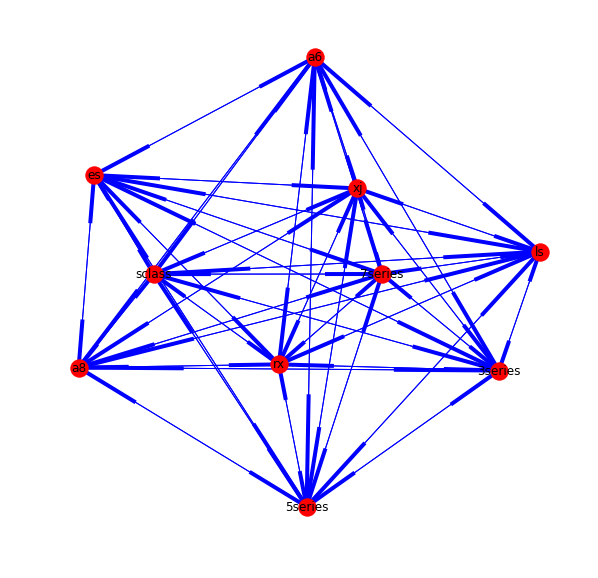

In [19]:
G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodesize=20)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color = 'b', arrows=True)
plt.axis('off')
plt.show()

### Part (b)

Getting the unweighted pagerank, by setting the weight and using networkx calculated values

In [5]:
page_rank_unweighted = nx.pagerank(G, alpha = 0.99, weight = 1)
page_rank_unweighted

{'3series': 0.09315393834610573,
 '5series': 0.10468175461478667,
 '7series': 0.10986869703854982,
 'a6': 0.0982533295721719,
 'a8': 0.10986869703854985,
 'es': 0.10986869703854983,
 'ls': 0.10986869703854982,
 'rx': 0.07295573223238781,
 'sclass': 0.10986869703854982,
 'xj': 0.08161176004179858}

Getting the weighted pagerank, by  using networkx and allowing the use of the edge weights calculated in previous steps

In [6]:
page_rank_weighted = nx.pagerank(G, alpha = 0.99)
page_rank_weighted

{'3series': 0.10735667075588687,
 '5series': 0.098209925633999079,
 '7series': 0.071673100210594323,
 'a6': 0.13625204213015285,
 'a8': 0.14893030745926053,
 'es': 0.14212528644935021,
 'ls': 0.11277502731113064,
 'rx': 0.050368637316756081,
 'sclass': 0.080150282429632375,
 'xj': 0.052158720303237205}

Creating a dataframe of the different models and showing the unweighted and weighted pagerank values, along with the sales values. 

In [7]:
partb_df1 = pd.DataFrame.from_dict(page_rank_unweighted, orient = 'index')
partb_df2 = pd.DataFrame.from_dict(page_rank_weighted, orient = 'index')
partb_df1.columns = ['Page Rank Unweighted']
partb_df2.columns = ['Page Rank Weighted']
partb_df1 = partb_df1.sort_index()
partb_df2 = partb_df2.sort_index()

partb_df = pd.concat([partb_df1,partb_df2], axis=1)
partb_df['Sales'] = [220000, 60000, 14000, 20000, 12000, 135000, 30000, 120000, 25000, 6600]
partb_df.sort_values('Sales', ascending=False)

,Page Rank Unweighted,Page Rank Weighted,Sales
3series,0.093154,0.107357,220000
es,0.109869,0.142125,135000
rx,0.072956,0.050369,120000
5series,0.104682,0.098210,60000
ls,0.109869,0.112775,30000
sclass,0.109869,0.080150,25000
a6,0.098253,0.136252,20000
7series,0.109869,0.071673,14000
a8,0.109869,0.148930,12000
xj,0.081612,0.052159,6600


Calculation of the unweighted page correlation with the sales of each model

In [8]:
partb_df['Page Rank Unweighted'].corr(partb_df['Sales'])

-0.28944274294681338

Calculation of the weighted page correlation with the sales of each model

In [9]:
partb_df['Page Rank Weighted'].corr(partb_df['Sales'])

0.074980268832453636

<b> The weighted page rank correlation was smaller in magnitude, but was positive in comparison to the unweighted page rank results. The weighted page rank captures additional data, but weighting each model essentially by its importance. A8 and ES are the models that show a substantial increase in PageRank.

### Part (c)

#### Note: I manually renamed the header on Sheet 3 of the Edmunds Reviews excel file to "Review" so as to be consistent with all other sheets in the file. That way, all reviews would fall in the same dataframe column. 

In [10]:
ed = pd.read_excel('Edmunds Reviews.xlsx', sheetname = 0)
# ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 1))
# ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 2))
# ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 3))
# ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 4))
# ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 5))
len(ed['Review'])

1308

Calculation of sentiment analysis values using nltk for each of the models, the portion of each review that was analyzed was 70 characters in either direction of where the model was mentioned

In [11]:
sentscores_df = pd.DataFrame(np.nan, index = ed.index, columns=models)

sid = SIA()

i = 0
for review in ed['Review']:
    review = review.lower()
    for b in models:
        brandsentlist =[]
        for match in re.finditer(b, review):
            begin = match.start()
            end = match.end()
            sentence = review[begin-70:end+70]
            sentiment = sid.polarity_scores(sentence)['compound']
            brandsentlist.append(sentiment)
        brand_message_sent = np.mean(brandsentlist)
        sentscores_df[b][i] = brand_message_sent
    i+=1

sentscores_df.head()

/Users/timothylai/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/timothylai/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,es,ls,rx,a8,a6,3series,5series,7series,xj,sclass
0,0.605600,0.728775,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.421500,NaN,NaN,0.13085,NaN,NaN,NaN,0.2617,NaN,NaN
2,0.421500,NaN,NaN,0.13085,NaN,NaN,NaN,0.2617,NaN,NaN
3,0.261831,0.030500,NaN,0.81360,0.0,NaN,NaN,NaN,NaN,NaN
4,-0.073140,0.628100,0.374,0.00000,0.0,NaN,NaN,NaN,NaN,NaN


#### Computing PageRank:

Using our newly created sentiment value dataframe to calculate edge values between models

In [12]:
edge_list = []

def get_edges():
    for model1 in models:
        for model2 in models[models.index(model1)+1:]:
            pos_sent = []
            neg_sent = []
            for i in range(0,len(sentscores_df)):
                sent_model1 = sentscores_df[model1][i]
                sent_model2 = sentscores_df[model2][i]
                if (not(np.isnan(sent_model1)) & (not(np.isnan(sent_model2)))):
                    edge_weight = sent_model1 - sent_model2
                    if edge_weight >= 0:
                        pos_sent.append(edge_weight)
                    elif edge_weight < 0:
                        neg_sent.append(edge_weight)
            if len(pos_sent) > 0:
                edge_list.append([model1, model2, np.mean(pos_sent)])
            if len(neg_sent) > 0:
                edge_list.append([model2, model1, abs(np.mean(neg_sent))])
    return edge_list

get_edges()

[['es', 'ls', 0.19883730810344308],
 ['ls', 'es', 0.18710648780672107],
 ['es', 'rx', 0.26007298360994169],
 ['rx', 'es', 0.26974442962499007],
 ['es', 'a8', 0.24558950314311698],
 ['a8', 'es', 0.26585911530228035],
 ['es', 'a6', 0.29045008613730294],
 ['a6', 'es', 0.31317463029427833],
 ['es', '3series', 0.19295375804127238],
 ['3series', 'es', 0.23811318016244659],
 ['es', '5series', 0.26150915854395695],
 ['5series', 'es', 0.20969067574943151],
 ['es', '7series', 0.23376656203269902],
 ['7series', 'es', 0.26572615335896344],
 ['es', 'xj', 0.30864368507441325],
 ['xj', 'es', 0.25789040026036575],
 ['es', 'sclass', 0.21931981936436157],
 ['sclass', 'es', 0.21471193580923986],
 ['ls', 'rx', 0.23683276129846034],
 ['rx', 'ls', 0.32328063305579346],
 ['ls', 'a8', 0.2430294646515101],
 ['a8', 'ls', 0.31970941173930667],
 ['ls', 'a6', 0.33679119004544383],
 ['a6', 'ls', 0.35822906278309508],
 ['ls', '3series', 0.29353872338247333],
 ['3series', 'ls', 0.33316088061465721],
 ['ls', '5series'

Putting edge values into networkx model and plotting a visualization of the network

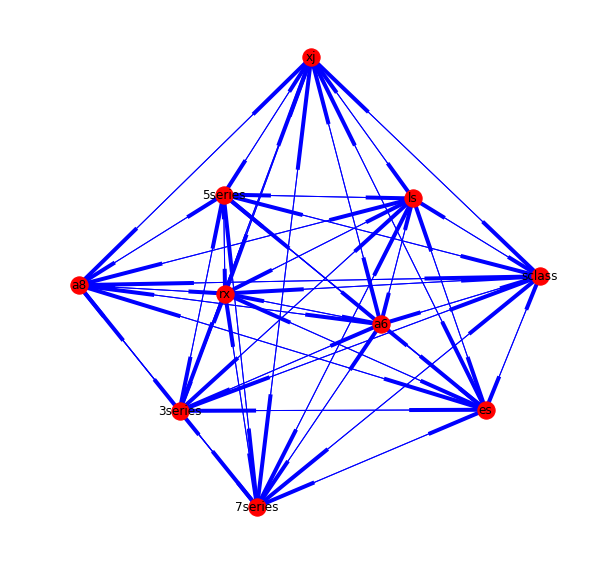

In [13]:
G_auto = nx.DiGraph()
G_auto.add_weighted_edges_from(edge_list)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G_auto)
nx.draw_networkx_nodes(G_auto, pos, nodesize=20)
nx.draw_networkx_labels(G_auto, pos)
nx.draw_networkx_edges(G_auto, pos, edge_color = 'b', arrows=True)
plt.axis('off')
plt.show()

Calculation of unweighted page rank values

In [14]:
page_rank_unweighted_auto = nx.pagerank(G_auto, alpha = 0.99, weight = 1)
page_rank_unweighted_auto

{'3series': 0.09999999999999998,
 '5series': 0.09999999999999998,
 '7series': 0.09999999999999998,
 'a6': 0.09999999999999998,
 'a8': 0.09999999999999998,
 'es': 0.09999999999999998,
 'ls': 0.09999999999999998,
 'rx': 0.09999999999999998,
 'sclass': 0.09999999999999998,
 'xj': 0.09999999999999998}

Calculation of weighted page rank values

In [15]:
page_rank_weighted_auto = nx.pagerank(G_auto, alpha = 0.99)
page_rank_weighted_auto

{'3series': 0.087343810791138773,
 '5series': 0.1058710465049157,
 '7series': 0.10270174943787778,
 'a6': 0.1098734204208574,
 'a8': 0.10383727795400439,
 'es': 0.079821386937137334,
 'ls': 0.095415185384503304,
 'rx': 0.10808962826060201,
 'sclass': 0.092036024153031332,
 'xj': 0.11501047015593183}

Unweighted and weighted page rank values for each model were then placed into a dataframe alongside their sales values

In [16]:
partc_df1 = pd.DataFrame.from_dict(page_rank_unweighted_auto, orient = 'index')
partc_df2 = pd.DataFrame.from_dict(page_rank_weighted_auto, orient = 'index')
partc_df1.columns = ['Page Rank Unweighted']
partc_df2.columns = ['Page Rank Weighted']
partc_df1 = partc_df1.sort_index()
partc_df2 = partc_df2.sort_index()

partc_df = pd.concat([partc_df1,partc_df2], axis=1)
partc_df['Sales'] = [220000, 60000, 14000, 20000, 12000, 135000, 30000, 120000, 25000, 6600]
partc_df.sort_values('Sales', ascending=False)

,Page Rank Unweighted,Page Rank Weighted,Sales
3series,0.1,0.087344,220000
es,0.1,0.079821,135000
rx,0.1,0.108090,120000
5series,0.1,0.105871,60000
ls,0.1,0.095415,30000
sclass,0.1,0.092036,25000
a6,0.1,0.109873,20000
7series,0.1,0.102702,14000
a8,0.1,0.103837,12000
xj,0.1,0.115010,6600


Calculation of correlation between unweighted and sales values

In [17]:
partc_df['Page Rank Unweighted'].corr(partc_df['Sales'])

nan

Calculation of correlation between weighted and sales values

In [18]:
partc_df['Page Rank Weighted'].corr(partc_df['Sales'])

-0.58545454960657672

The correlation compared to the manual approach is fairly different. As for the unweighted in the manual one it was slightly negative, while for the automatic it did not provide useful info for unweighted. In regards to unweighted the manual provided a tiny positive correlation, meanwhile the automatic provided a medium negative correlation. So very big differences between the manual and automatic sentiment scoring. 

In [20]:
partc_df_comp = pd.concat([partb_df2,partc_df2], axis=1)
partc_df_comp['Sales'] = [220000, 60000, 14000, 20000, 12000, 135000, 30000, 120000, 25000, 6600]
partc_df_comp.sort_values('Sales', ascending=False)

,Page Rank Weighted,Page Rank Weighted,Sales
3series,0.107357,0.087344,220000
es,0.142125,0.079821,135000
rx,0.050369,0.108090,120000
5series,0.098210,0.105871,60000
ls,0.112775,0.095415,30000
sclass,0.080150,0.092036,25000
a6,0.136252,0.109873,20000
7series,0.071673,0.102702,14000
a8,0.148930,0.103837,12000
xj,0.052159,0.115010,6600


Finally, in the comparison between weighted page ranks for Part (b) and Part (c), the weighted page rank changes (some increase and some decrease) - by automating the post extraction, I would anticipate slightly less accuracy in terms of importance for the automated case (as the process has to be trained, while a human can be a better judge - obviously the consequence here would be added amount of time to process).